In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression

In [2]:
d_tr = pd.read_csv('train.csv')
d_te = pd.read_csv('test.csv')

train = pd.DataFrame(d_tr)
test = pd.DataFrame(d_te)

train.head()

train.drop('PassengerId',axis=1,inplace=True)

In [3]:
sex = {'male':0,'female':1}

In [4]:
data = [train, test]

for i in data:
    i['Sex']=i['Sex'].map(sex)

In [5]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

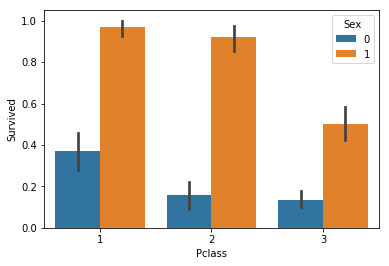

In [7]:
sns.barplot(x='Pclass',y='Survived',data=train,hue='Sex')

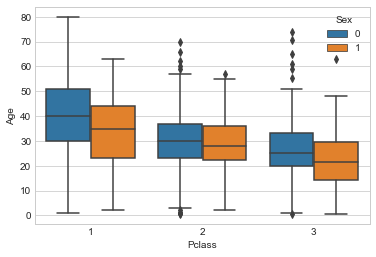

In [8]:
sns.set_style(style='whitegrid')
sns.boxplot(x='Pclass',y='Age',data=train,hue='Sex')

In [9]:
def tofillage(cols):
    age=cols[0]
    pclass=cols[1]
    sex=cols[2]
    
    if pd.isnull(age) == True:
        if pclass == 1:
            if sex == 0:
                return 41
            else:
                return 35
        if pclass == 2:
            if sex == 0:
                return 30
            else:
                return 27
        if pclass == 3:
            if sex == 3:
                return 25
            else:
                return 22
    else:
        return age

In [10]:
train['Age'] = train[['Age','Pclass','Sex']].apply(tofillage,axis=1)

In [11]:
test['Age'] = test[['Age','Pclass','Sex']].apply(tofillage,axis=1)

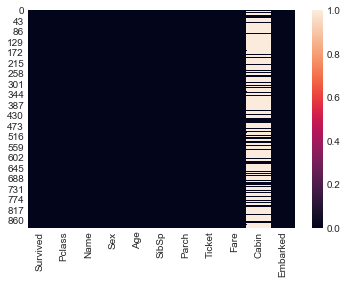

In [12]:
sns.heatmap(train.isnull())

In [13]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

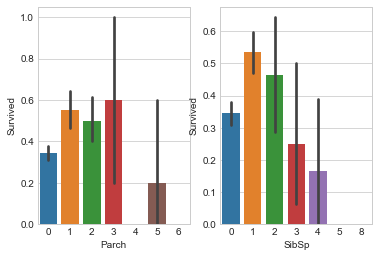

In [15]:
sns.barplot(x='Embarked',y='Survived',data=train,hue='Sex')

plt.subplot(1,2,1)
sns.barplot(x='Parch',y='Survived',data=train)
plt.subplot(1,2,2)
sns.barplot(x='SibSp',y='Survived',data=train)

In [16]:
train['Family'] = train['Parch']+train['SibSp']

In [17]:
test['Family'] = test['Parch']+test['SibSp']

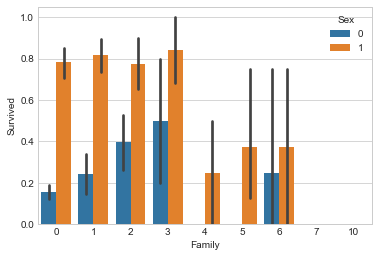

In [18]:
sns.barplot(x='Family',y='Survived',data=train,hue='Sex')

In [19]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


In [20]:
train.drop(['Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)

train.drop(['Embarked'],axis=1,inplace=True)

In [21]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Family
0,0,3,0,22.0,7.2500,1
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,1
4,0,3,0,35.0,8.0500,0


In [22]:
y_train = train['Survived']

train.drop(['Survived'],axis=1,inplace=True)

In [23]:
x_test = test.drop(['Name','SibSp','Parch','Ticket','Cabin','Embarked','PassengerId'],axis=1)

In [24]:
train.head()

,Pclass,Sex,Age,Fare,Family
0,3,0,22.0,7.2500,1
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,0
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0


In [25]:
x_test.head()

,Pclass,Sex,Age,Fare,Family
0,3,0,34.5,7.8292,0
1,3,1,47.0,7.0000,1
2,2,0,62.0,9.6875,0
3,3,0,27.0,8.6625,0
4,3,1,22.0,12.2875,2


In [26]:
x_test.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      1
Family    0
dtype: int64

In [27]:
x_test.fillna(8.05,inplace=True)

In [28]:
logreg = LogisticRegression()

logreg.fit(train,y_train)

y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(train, y_train) * 100, 2)

print(round(acc_log,2,), "%")

80.7 %
